# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the Dataset

In [2]:
data = pd.read_csv('car data.csv')


# Step 2: Explore the Data


In [3]:
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Head:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    

# Step 3: Check for Missing Values

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


# Step 4: Data Preprocessing

In [5]:
# Convert categorical variables to numeric if necessary
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns: {categorical_columns}")
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


Categorical Columns: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


# Step 5: Features and target selection

In [7]:
target_column = 'Selling_Price'  # Replace with the actual target column name in your dataset
features = data.drop(columns=[target_column])
target = data[target_column]


# Step 6: Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Model Training

In [9]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 8: Model Evaluation

In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 0.5907950819672131
R-squared Score: 0.9673373873539192


# Feature Importance

In [11]:
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
                        Feature  Importance
1                 Present_Price    0.868146
0                          Year    0.059892
2                    Driven_kms    0.031911
91        Car_Name_land cruiser    0.007772
104         Transmission_Manual    0.006167
..                          ...         ...
98       Car_Name_vitara brezza    0.000000
73             Car_Name_corolla    0.000000
41   Car_Name_Honda Dream Yuga     0.000000
64       Car_Name_Yamaha Fazer     0.000000
5            Car_Name_Activa 4g    0.000000

[105 rows x 2 columns]


# Step 9: Visualization

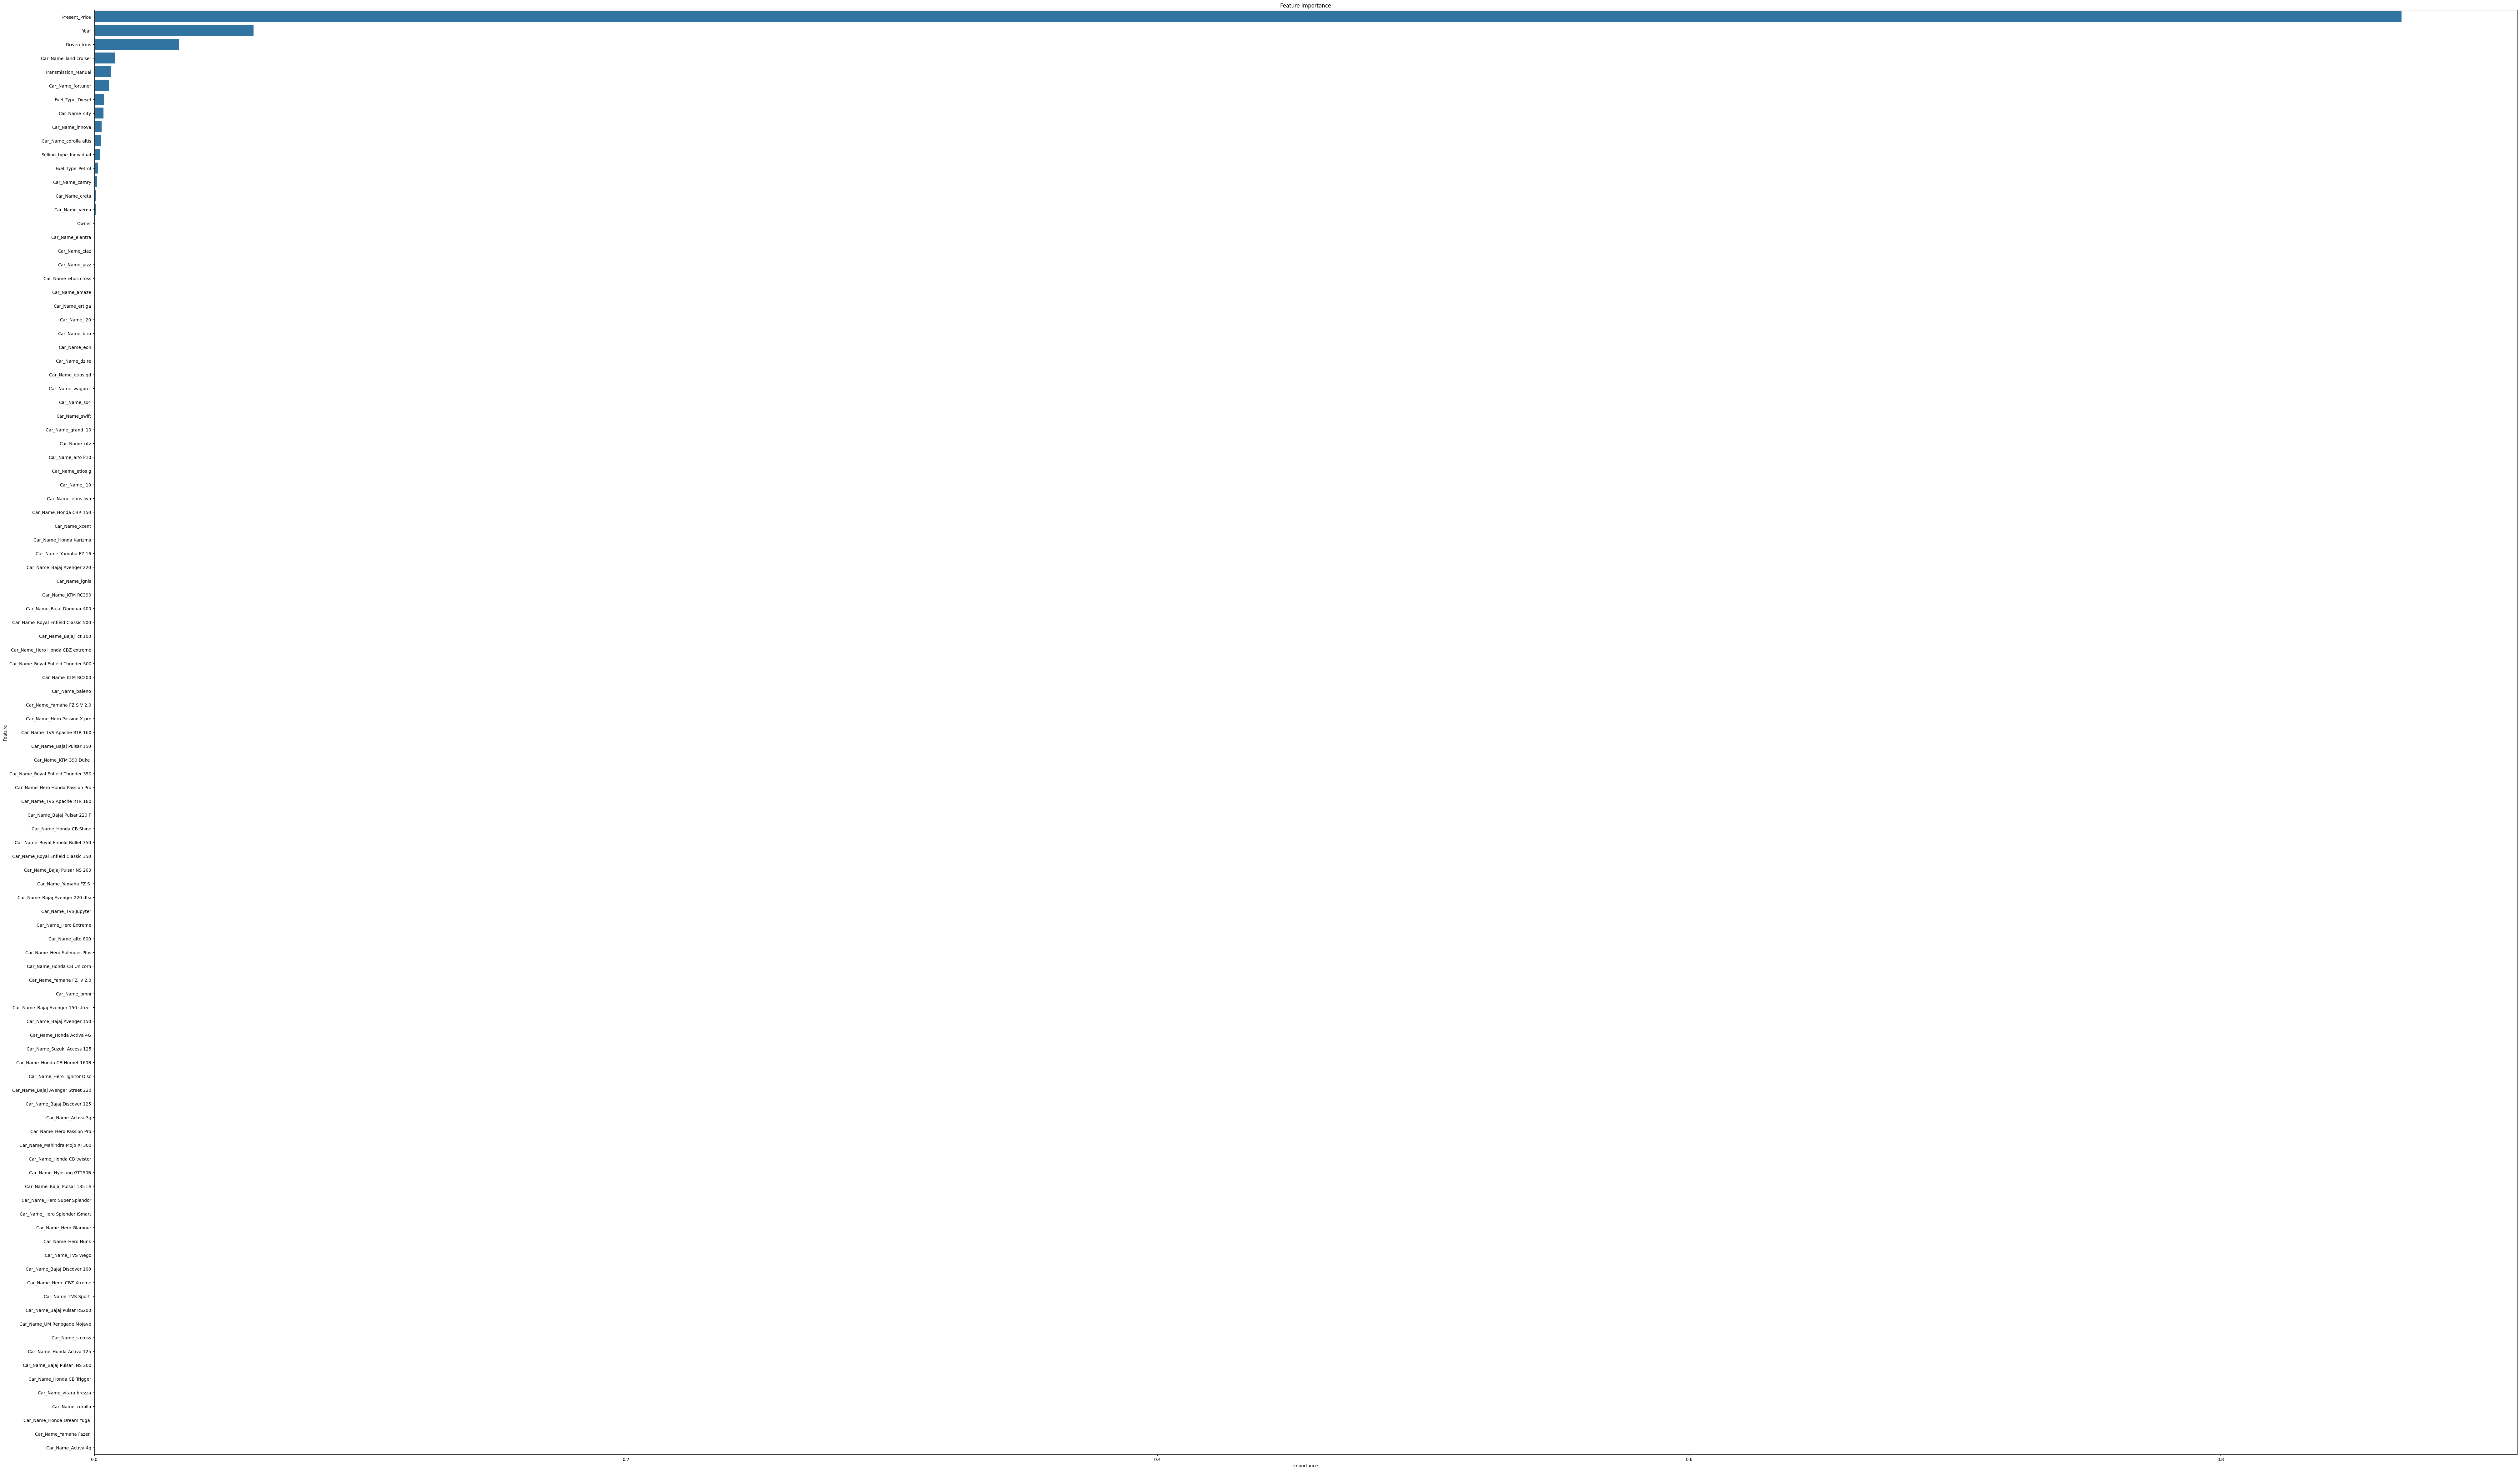

In [14]:
plt.figure(figsize=(100, 60))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

